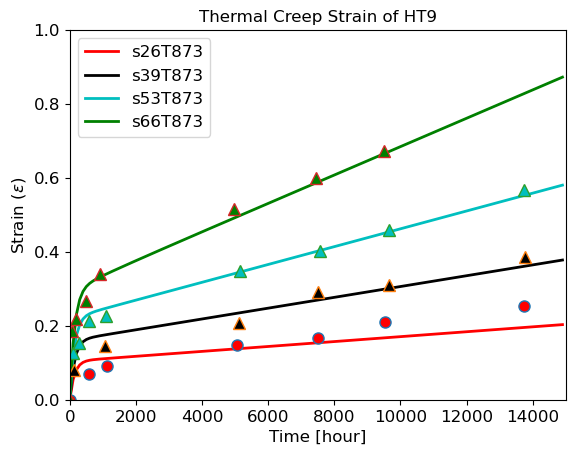

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf
%run Utilities_Indro.ipynb

excel_filename = 'F82H_Indro.xlsx'

HT9_low_stress_col_names = ["Time_HT9s66T873 (h)", "Strain_HT9s66T873",\
                            "Time_HT9s53T873 (h)", "Strain_HT9s53T873",\
                            "Time_HT9s39T873 (h)", "Strain_HT9s39T873",\
                            "Time_HT9s26T873 (h)", "Strain_HT9s26T873"]

HT9_low_stress_variables = ["Time_HT9s66T873", "Strain_HT9s66T873",\
                            "Time_HT9s53T873", "Strain_HT9s53T873",\
                            "Time_HT9s39T873", "Strain_HT9s39T873",\
                            "Time_HT9s26T873", "Strain_HT9s26T873"]

load_data(excel_filename, "HT-9 Creep Strain", HT9_low_stress_col_names, HT9_low_stress_variables)

fsize = 12 # font size
msize = 8 # marker size

t = 3600 * np.arange(0, 15000, 100)
t_h = t / 3600
n_size = t.size

e1 = np.zeros(n_size)
e2 = np.zeros(n_size)
e3 = np.zeros(n_size)
e4 = np.zeros(n_size)

P_0 = lambda T: 0.5 - 2600 / T
P_1 = lambda T: 1 + 50 / T
e_p = lambda s, T: 10**(P_0(T) + P_1(T) * np.log10(s))
m = 2e-6
s0 = lambda s: 0.025 * s + 0.0055 * s**2
S_l = lambda T: -5.7 - 5562.28 / T
e_s = lambda s, T: 10**(S_l(T) + 2.5 * np.log10(s - s0(s)))
eps = lambda s, T, t: e_p(s, T) * (1 - np.exp(-m * t)) + e_s(s, T) * t
t_R = 10**7 * 3600

for i in range(n_size):
    e1[i] = eps(26, 873, t[i])
    e2[i] = eps(39, 873, t[i])
    e3[i] = eps(53, 873, t[i])
    e4[i] = eps(66 / (1 - (t[i] / t_R)**(1 / 3.5)), 873, t[i])

plt.figure('HT9 Creep Strain - Low Stress')
plt.plot(t_h, e1, 'r', t_h, e2, 'k', t_h, e3, 'c', t_h, e4, 'g', linewidth=2)
plt.plot(Time_HT9s26T873, Strain_HT9s26T873, 'o', markersize=msize, markerfacecolor='red')
plt.plot(Time_HT9s39T873, Strain_HT9s39T873, '^', markersize=msize, markerfacecolor='k')
plt.plot(Time_HT9s53T873, Strain_HT9s53T873, '^', markersize=msize, markerfacecolor='c')
plt.plot(Time_HT9s66T873, Strain_HT9s66T873, '^', markersize=msize, markerfacecolor='g')
plt.xlim([0, 15000])
plt.ylim([0, 1])
plt.xlabel('Time [hour]', fontsize=fsize)
plt.ylabel(r'Strain ($\epsilon$)', fontsize=fsize)
plt.legend(['s26T873', 's39T873', 's53T873', 's66T873'], loc='upper left', fontsize=fsize)
plt.title('Thermal Creep Strain of HT9')
plt.tick_params(axis='both', which='major', labelsize=fsize)    

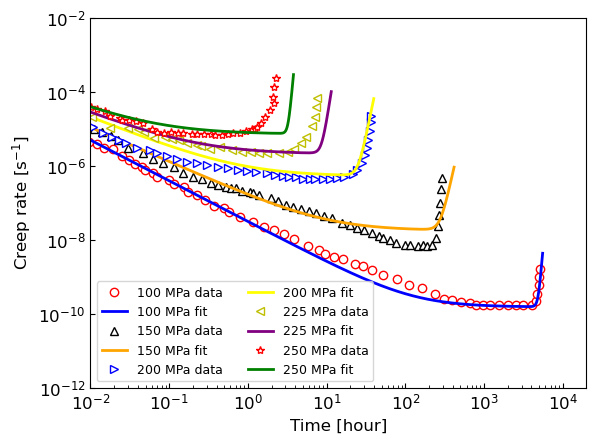

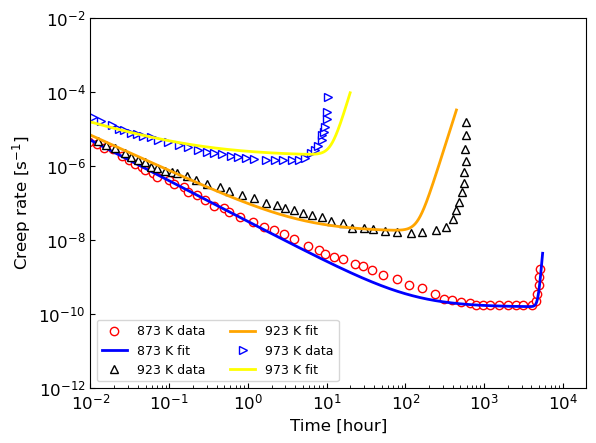

In [2]:
T91_col_names = \
    ["log10(time (h))_T91s100T873", "log10(strain rate)_T91s100T873",
    "log10(time (h))_T91s125T873", "log10(strain rate)_T91s125T873",
    "log10(time (h))_T91s150T873", "log10(strain rate)_T91s150T873",
    "log10(time (h))_T91s200T873", "log10(strain rate)_T91s200T873",
    "log10(time (h))_T91s225T873", "log10(strain rate)_T91s225T873",
    "log10(time (h))_T91s250T873", "log10(strain rate)_T91s250T873",
    "log10(time (h))_T91s100T923", "log10(strain rate)_T91s100T923",
    "log10(time (h))_T91s100T973", "log10(strain rate)_T91s100T973"]

T91_variables = \
    ["log10time_T91s100T873", "log10strainrate_T91s100T873",
    "log10time_T91s125T873", "log10strainrate_T91s125T873",
    "log10time_T91s150T873", "log10strainrate_T91s150T873",
    "log10time_T91s200T873", "log10strainrate_T91s200T873",
    "log10time_T91s225T873", "log10strainrate_T91s225T873",
    "log10time_T91s250T873", "log10strainrate_T91s250T873",
    "log10time_T91s100T923", "log10strainrate_T91s100T923",
    "log10time_T91s100T973", "log10strainrate_T91s100T973"]

load_data(excel_filename, "T91 Creep Strain", T91_col_names, T91_variables)

fsize = 12
msize = 8

i_max = 10000
t_max = 10000

A_p = -0.02193
B_p = -0.02796
C_p = 28.7

A_r = -0.021
B_r = -0.0231
C_r = 26.1

A_e = -68.97
B_e = 11.75
C_e = 0.04084

gamma_0 = 1.04
gamma_1 = 4e-3
gamma_2 = 2e-3
a_0 = -4.2
b_0 = 3.5e-3
c_0 = 1e-6

def get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10**Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        
        x[i] = -2 + (i - 1) * del_x
        time[i] = 10**x[i]
    
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10**y_I + 10**y_II + 10**y_III
    
        if x[i] > Lt_r(sig, Temp):
            epsdot[i] = 0

    return time, epsdot

get_epsdot_T91_lambda = lambda sig, Temp:\
    get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)
    
plt.figure("Model representation of creep strain data at 600 C")
T91s100T873_endpoint = 0.9575
time, epsdot_T91 = get_epsdot_T91_lambda(100, 873)
plt.loglog(10**log10time_T91s100T873, 10**log10strainrate_T91s100T873, 'ro', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s100T873_endpoint)], epsdot_T91[:int(i_max*T91s100T873_endpoint)], "blue", linewidth=2)

T91s150T873_endpoint = 0.77
time, epsdot_T91 = get_epsdot_T91_lambda(150, 873)
plt.loglog(10**log10time_T91s150T873, 10**log10strainrate_T91s150T873, 'k^', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s150T873_endpoint)], epsdot_T91[:int(i_max*T91s150T873_endpoint)], "orange", linewidth=2)

T91s200T873_endpoint = 0.6
time, epsdot_T91 = get_epsdot_T91_lambda(200, 873)
plt.loglog(10**log10time_T91s200T873, 10**log10strainrate_T91s200T873, 'b>', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s200T873_endpoint)], epsdot_T91[:int(i_max*T91s200T873_endpoint)], "yellow", linewidth=2)

T91s225T873_endpoint = 0.51
time, epsdot_T91 = get_epsdot_T91_lambda(225, 873)
plt.loglog(10**log10time_T91s225T873, 10**log10strainrate_T91s225T873, 'y<', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s225T873_endpoint)], epsdot_T91[:int(i_max*T91s225T873_endpoint)], "purple", linewidth=2)

T91s250T873_endpoint = 0.43
time, epsdot_T91 = get_epsdot_T91_lambda(250, 873)
plt.loglog(10**log10time_T91s250T873, 10**log10strainrate_T91s250T873, 'r*', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s250T873_endpoint)], epsdot_T91[:int(i_max*T91s250T873_endpoint)], "green", linewidth=2)

plt.xlim([10**-2, 2 * 10**4])
plt.ylim([10**-12, 10**-2])
plt.ylabel(r'Creep rate [s$^{-1}$]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['100 MPa data', '100 MPa fit',\
            '150 MPa data', '150 MPa fit',\
            '200 MPa data', '200 MPa fit',\
            '225 MPa data', '225 MPa fit',\
            '250 MPa data', '250 MPa fit'],\
            loc='lower left', ncol=2, fontsize=9)
plt.gca().tick_params(axis='both', which='both', direction='in', labelsize=fsize)


plt.figure("Model representation of creep strain data at 100 MPa")

T91s100T873_endpoint = 0.9575
time, epsdot_T91 = get_epsdot_T91_lambda(100, 873)
plt.loglog(10**log10time_T91s100T873, 10**log10strainrate_T91s100T873, 'ro', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s100T873_endpoint)], epsdot_T91[:int(i_max*T91s100T873_endpoint)], "blue", linewidth=2)

T91s100T923_endpoint = 0.775
time, epsdot_T91 = get_epsdot_T91_lambda(100, 923)
plt.loglog(10**log10time_T91s100T923, 10**log10strainrate_T91s100T923, 'k^', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s100T923_endpoint)], epsdot_T91[:int(i_max*T91s100T923_endpoint)], "orange", linewidth=2)

T91s100T973_endpoint = 0.55
time, epsdot_T91 = get_epsdot_T91_lambda(100, 973)
plt.loglog(10**log10time_T91s100T973, 10**log10strainrate_T91s100T973, 'b>', markerfacecolor='white')
plt.loglog(time[:int(i_max*T91s100T973_endpoint)], epsdot_T91[:int(i_max*T91s100T973_endpoint)], "yellow", linewidth=2)

plt.xlim([10 ** -2, 2 * 10 ** 4])
plt.ylim([10 ** -12, 10 ** -2])
plt.ylabel(r'Creep rate [s$^{-1}$]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['873 K data', '873 K fit',\
            '923 K data', '923 K fit',\
            '973 K data', '973 K fit'],\
           loc='lower left', ncol=2, fontsize=9)
plt.gca().tick_params(axis='both', which='both', direction='in', labelsize=fsize)

<>:61: SyntaxWarning: invalid escape sequence '\e'
<>:86: SyntaxWarning: invalid escape sequence '\e'
<>:61: SyntaxWarning: invalid escape sequence '\e'
<>:86: SyntaxWarning: invalid escape sequence '\e'
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\85986217.py:61: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\85986217.py:86: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\85986217.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])


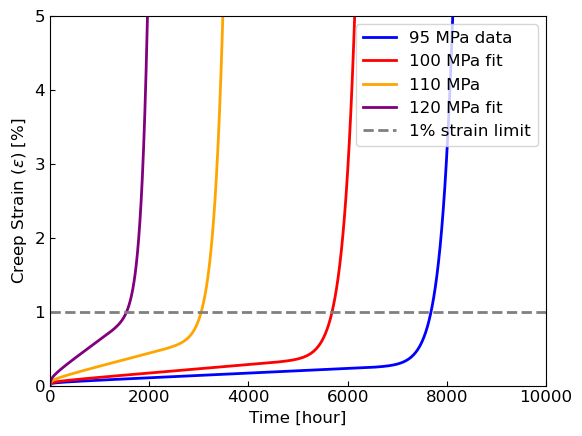

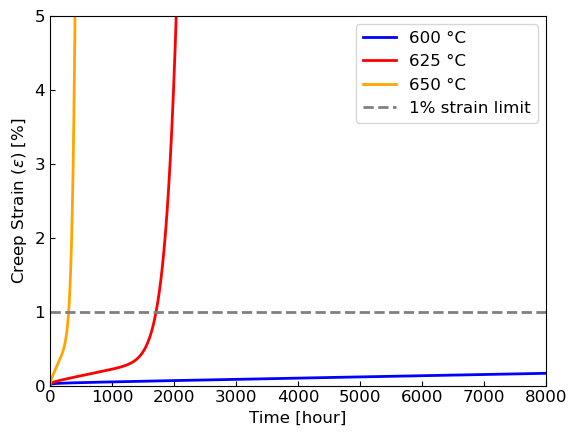

In [3]:
def get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)
    q = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10 ** Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        time[i] = (i + 1) * del_t
        x[i] = np.log10(time[i])
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10 ** y_I + 10 ** y_II + 10 ** y_III
        
        if epsdot[i] > 10 ** Le_r(sig, Temp) and x[i] > Lt_s(sig, Temp):
            epsdot[i] = 10 ** Le_r(sig, Temp)
        
        q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])
        if q[i] > 32:
            q[i] = 32

    return time, q

get_epsdot_F82H_lambda_1 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)
    
plt.figure("Model results for creep strain data at 600 C and various applied stress levels")
time, epsdot_F82H = get_epsdot_F82H_lambda_1(95, 873)
plt.plot(time, epsdot_F82H, "blue", linewidth=2)
time, epsdot_F82H = get_epsdot_F82H_lambda_1(100, 873)
plt.plot(time, epsdot_F82H, "red", linewidth=2)
time, epsdot_F82H = get_epsdot_F82H_lambda_1(110, 873)
plt.plot(time, epsdot_F82H, "orange", linewidth=2)
time, epsdot_F82H = get_epsdot_F82H_lambda_1(120, 873)
plt.plot(time, epsdot_F82H, "purple", linewidth=2)

plt.plot(np.linspace(0, 10000, 10), np.ones(10), "gray", linewidth=2, linestyle='--')

plt.xlim([0, 10000])
plt.ylim([0, 5])
plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['95 MPa data', '100 MPa fit', '110 MPa', '120 MPa fit', '1% strain limit'],\
            loc='upper right', ncol=1, fontsize=fsize)
plt.gca().tick_params(axis='both', which='both', direction='in', labelsize=fsize)

t_max = 8000

get_epsdot_F82H_lambda_2 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)
    
plt.figure("Model results for creep strain data at 90 MPa and various temperatures")
time, epsdot_F82H = get_epsdot_F82H_lambda_2(90, 873)
plt.plot(time, epsdot_F82H, "blue", linewidth=2)
time, epsdot_F82H = get_epsdot_F82H_lambda_2(90, 898)
plt.plot(time, epsdot_F82H, "red", linewidth=2)
time, epsdot_F82H = get_epsdot_F82H_lambda_2(90, 923)
plt.plot(time, epsdot_F82H, "orange", linewidth=2)

plt.plot(np.linspace(0, 8000, 10), np.ones(10), "gray", linewidth=2, linestyle='--')

plt.xlim([0, 8000])
plt.ylim([0, 5])
plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['600 °C', '625 °C', '650 °C', '1% strain limit'],\
            loc='upper right', ncol=1, fontsize=fsize)
plt.gca().tick_params(axis='both', which='both', direction='in', labelsize=fsize)

<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\552968497.py:27: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\552968497.py:46: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
C:\Users\indro\AppData\Local\Temp\ipykernel_47560\85986217.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])


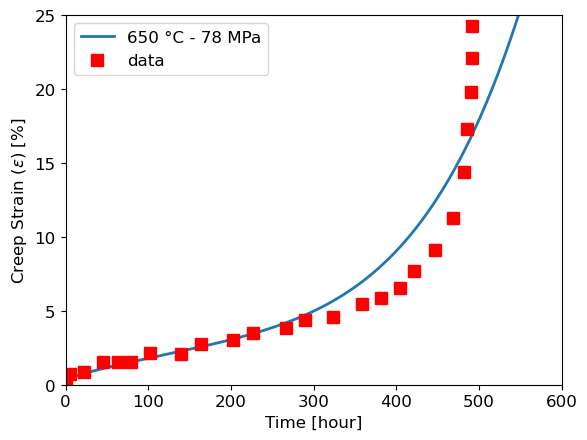

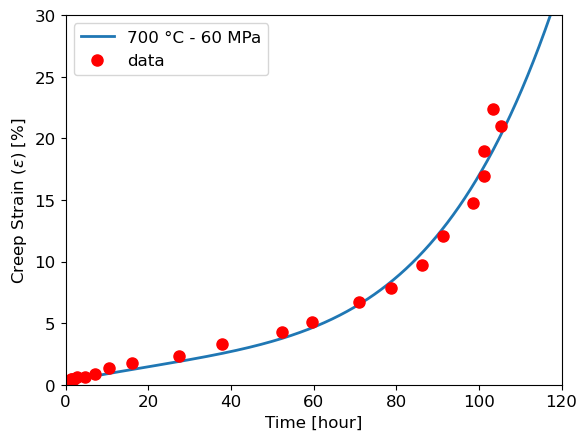

In [4]:
F82H_col_names = \
    ["Time_F82Hs78T873 (h)", "Strain rate_F82Hs78T873",
    "Time_F82Hs60T973 (h)", "Strain rate_F82Hs60T973"]

F82H_variables = \
    ["Time_F82Hs78T873", "Strainrate_F82Hs78T873",
    "Time_F82Hs60T973", "Strainrate_F82Hs60T973"]

load_data(excel_filename, "F82H Creep Strain", F82H_col_names, F82H_variables)

gamma_0 = 1.125
C_r = 26.25
A_e = -67.5
A_r = -0.02121
B_r = -0.02329
t_max = 600

get_epsdot_F82H_lambda_3 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

plt.figure("Model results of creep strain of F82H at 650 C and 78 MPa")
time, epsdot_F82H = get_epsdot_F82H_lambda_3(78, 923)
plt.plot(time, epsdot_F82H, linewidth=2)
plt.plot(Time_F82Hs78T873, Strainrate_F82Hs78T873, 'rs', markersize=msize)
plt.xlim([0, 600])
plt.ylim([0, 25])
plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['650 °C - 78 MPa', 'data'], loc='upper left', fontsize=fsize)
plt.tick_params(axis='both', which='major', labelsize=fsize)

gamma_0 = 1.15
A_r = -0.021
B_r = -0.0231
t_max = 120

get_epsdot_F82H_lambda_4 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

plt.figure("Model results of creep strain of F82H at 700 C and 60 MPa")
time, epsdot_F82H = get_epsdot_F82H_lambda_4(60, 973)
plt.plot(time, epsdot_F82H, linewidth=2)
plt.plot(Time_F82Hs60T973, Strainrate_F82Hs60T973, 'ro', markersize=msize)
plt.xlim([0, 120])
plt.ylim([0, 30])
plt.ylabel('Creep Strain ($\epsilon$) [%]', fontsize=fsize)
plt.xlabel('Time [hour]', fontsize=fsize)
plt.legend(['700 °C - 60 MPa', 'data'], loc='upper left', fontsize=fsize)
plt.tick_params(axis='both', which='major', labelsize=fsize)